In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
df = pd.read_csv('new_data.csv')

In [40]:
df.head(100)

,Country,BCA,BCA_NGDPD,GGR_NGDP,GGXCNL_NGDP,GGXONLB_NGDP,GGXWDG_NGDP,GGX_NGDP,LP,NGDP,...,NGDP_D,NGDP_FY,NGDP_RPCH,NID_NGDP,PCPI,PCPIPCH,PPPGDP,PPPPC,TM_RPCH,TX_RPCH
0,Afghanistan,2.247,11.157,25.694,-2.243,-2.206,7.397,27.937,32.941,1547.290,...,120.050,1547.290,-2.351,16.462,120.671,5.607,80.912,2456.29,-2.925,0.534
1,Albania,-1.315,-8.677,25.905,-6.713,-4.621,75.927,32.619,2.878,1644.080,...,203.320,1644.080,-3.482,22.790,108.613,1.621,40.658,14128.00,-19.535,-27.549
2,Algeria,-18.711,-12.911,30.684,-11.959,-11.655,52.273,42.643,43.851,18383.800,...,256.869,18383.800,-5.100,41.852,211.180,2.415,497.030,11334.53,-18.943,-4.154
3,Andorra,0.422,14.634,40.485,-2.960,0.000,46.329,43.445,0.078,2.531,...,106.557,2.531,-11.184,0.000,102.298,0.257,4.092,52451.57,0.000,0.000
4,Angola,0.872,1.500,20.983,-1.898,4.944,136.540,22.882,31.031,33611.360,...,2293.820,33611.360,-5.750,24.953,431.227,22.277,212.172,6837.35,-33.037,-7.342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Liberia,-0.498,-16.389,31.267,-3.841,-2.555,58.657,35.108,5.058,3.037,...,98.364,3.037,-2.967,0.000,856.247,16.953,7.276,1438.59,4.813,-13.337
96,Libya,-3.974,-8.477,35.079,-22.279,-22.279,0.000,57.358,6.644,65.048,...,100.824,65.048,-29.476,28.554,328.318,1.468,110.119,16575.15,-41.699,-65.906
97,Lithuania,4.146,7.338,34.907,-7.268,-6.677,46.580,42.175,2.795,49.507,...,114.172,49.507,-0.132,13.470,110.628,1.062,109.599,39214.23,-4.380,0.434
98,Luxembourg,3.016,4.115,43.743,-3.420,-3.653,24.750,47.163,0.626,64.221,...,107.769,64.221,-1.777,17.900,105.938,0.005,75.187,120086.20,1.586,1.253


In [41]:
column_names = list(df)
column_names

['Country',
 'BCA',
 'BCA_NGDPD',
 'GGR_NGDP',
 'GGXCNL_NGDP',
 'GGXONLB_NGDP',
 'GGXWDG_NGDP',
 'GGX_NGDP',
 'LP',
 'NGDP',
 'NGDPD',
 'NGDPDPC',
 'NGDPPC',
 'NGDPRPPPPC',
 'NGDP_D',
 'NGDP_FY',
 'NGDP_RPCH',
 'NID_NGDP',
 'PCPI',
 'PCPIPCH',
 'PPPGDP',
 'PPPPC',
 'TM_RPCH',
 'TX_RPCH']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       195 non-null    object 
 1   BCA           195 non-null    float64
 2   BCA_NGDPD     195 non-null    float64
 3   GGR_NGDP      195 non-null    float64
 4   GGXCNL_NGDP   195 non-null    float64
 5   GGXONLB_NGDP  195 non-null    float64
 6   GGXWDG_NGDP   195 non-null    float64
 7   GGX_NGDP      195 non-null    float64
 8   LP            195 non-null    float64
 9   NGDP          195 non-null    float64
 10  NGDPD         195 non-null    float64
 11  NGDPDPC       195 non-null    float64
 12  NGDPPC        195 non-null    float64
 13  NGDPRPPPPC    195 non-null    float64
 14  NGDP_D        195 non-null    float64
 15  NGDP_FY       195 non-null    float64
 16  NGDP_RPCH     195 non-null    float64
 17  NID_NGDP      195 non-null    float64
 18  PCPI          195 non-null    

In [43]:
#df['NGDPRPC'] = df['NGDPRPC'].astype(float)
#df['PPPSH'] = df['PPPSH'].astype(float)
#df.loc[:, df.columns != 'Country'].astype(float)

##### Data Split 1: all of our final dataset, no scaling

In [44]:
# NGDPDPC - gdp_per_capita
y = df["NGDPDPC"]
X = df.drop(["NGDPDPC", "Country"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

##### Data Split 2: all of our final dataset, with scaling

In [45]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

##### Data Split 3: feature selected dataset, no scaling

In [46]:
y3 = y
X3 = df.drop(
    [
        "NGDPDPC",
        "BCA",
        "Country",
        "GGR_NGDP",
        "GGXCNL_NGDP",
        "GGXONLB_NGDP",
        "GGXWDG_NGDP",
        "GGX_NGDP",
        "LP",
        "NGDP",
        "NGDPD",
        "PPPPC",
    ],
    axis=1,
)

X3_train, X3_test, y3_train, y3_test = train_test_split(
    X3, y3, test_size=0.2, random_state=101
)

##### Data Split 4: feature selected dataset, with scaling

In [47]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Linear Regression

From our EDA, we can see that most features do not have a linear relationship with our labels (gdp_per_capita), yet we will try linear regression, and use the result as a reference (other methods should have better results).

##### Model Training

In [48]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

##### Predictions

In [49]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

##### Evaluation

In [50]:
print('Linear Regression Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, lm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, lm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, lm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, lm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, lm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, lm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, lm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, lm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, lm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, lm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, lm4_pred))

Linear Regression Performance:

all features, No scaling:
MAE: 4314.161598578343
RMSE: 5551.727846800206
R2_Score:  0.833598246392697

all features, with scaling:
MAE: 2463026.428448714
RMSE: 3110997.578859369
R2_Score:  -52250.75820077463

selected features, No scaling:
MAE: 4211.322424131792
RMSE: 5546.956906695006
R2_Score:  0.8338841219620264

selected features, with scaling:
MAE: 6204.078768278973
RMSE: 8540.932427577452
R2_Score:  0.6061669724532432


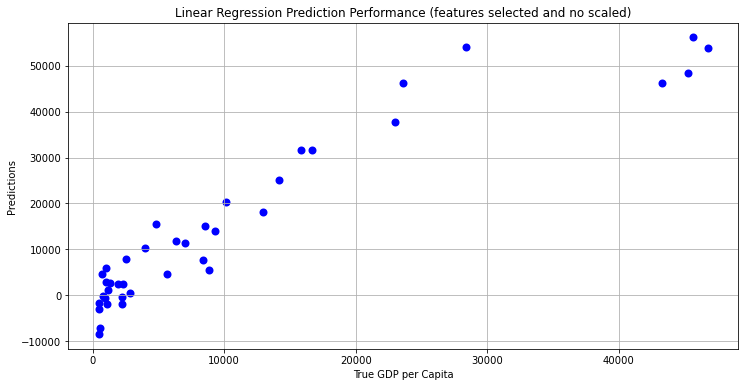

In [51]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred, linewidths=2, edgecolors='b', color='blue')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and no scaled)') 
plt.grid()
plt.show()

LR with feature selection and scaling.